# 대전시 cctv 현황 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 구별로 되어있는 파일 불러오기

df_dong = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_동구_CCTV_20190321.csv')
df_su = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_서구_CCTV_20190705.csv')
df_dae = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_대덕구_CCTV_20190331.csv')
df_u = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_유성구_CCTV_20190520.csv')
df_joong = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_중구_CCTV_20190527.csv')


In [3]:
# 대전시 하나로 합치기

x=df_dong.append(df_su,ignore_index=True)
y =df_dae.append(df_u,ignore_index=True)
z=x.append(y,ignore_index=True)
df_cctv=z.append(df_joong,ignore_index=True)
# df_cctv

In [4]:
# 컬럼 확인 및 관리기관명 바꾸기

df_cctv.columns
df_cctv.rename(columns={df_cctv.columns[0]:'대전지역별'},inplace=True)
df_cctv.head()
df_cctv.tail()

,대전지역별,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
3030,대전광역시 중구청,대전광역시 중구 대전천서로 745(중촌동),대전광역시 중구 대전천서로 745(중촌동),생활방범,2,200.0,공주슈퍼 앞 사거리,30.0,Apr-19,042-606-6090,36.335719,127.417921,2019-05-27
3031,대전광역시 중구청,대전광역시 중구 대전천서로 745(중촌동),대전광역시 중구 대전천서로 745(중촌동),생활방범,2,200.0,온누리빌라 앞 사거리,30.0,Apr-19,042-606-6090,36.330425,127.424775,2019-05-27
3032,대전광역시 중구청,대전광역시 중구 대전천서로 745(중촌동),대전광역시 중구 대전천서로 745(중촌동),생활방범,2,200.0,솔로몬시티 앞 사거리,30.0,Apr-19,042-606-6090,36.330434,127.417615,2019-05-27
3033,대전광역시 중구청,대전광역시 중구 대전천서로 745(중촌동),대전광역시 중구 대전천서로 745(중촌동),생활방범,2,200.0,태산가스산업 앞 삼거리,30.0,May-19,042-606-6090,36.315015,127.397053,2019-05-27
3034,대전광역시 중구청,대전광역시 중구 대전천서로 745(중촌동),대전광역시 중구 대전천서로 745(중촌동),생활방범,2,200.0,베리타스관 앞 사거리,30.0,May-19,042-606-6090,36.322069,127.421417,2019-05-27


In [5]:
df_cctv.drop(columns=['설치목적구분','카메라화소수','촬영방면정보','보관일수','설치년월','관리기관전화번호'],inplace=True)
df_cctv.columns

Index(['대전지역별', '소재지도로명주소', '소재지지번주소', '카메라대수', '위도', '경도', '데이터기준일자'], dtype='object')

In [6]:
# 카메라대수별로 정렬
df_cctv.sort_values(by='카메라대수',ascending=True)
df_cctv

,대전지역별,소재지도로명주소,소재지지번주소,카메라대수,위도,경도,데이터기준일자
0,대전광역시 동구,대전광역시 동구 계족로446번길 19(용전동),NaN,1,36.351339,127.433575,2019-03-21
1,대전광역시 동구,대전광역시 동구 계족로 459(용전동),NaN,1,36.352627,127.431277,2019-03-21
2,대전광역시 동구,대전광역시 동구 동서대로1678번길 38(성남동),NaN,1,36.347003,127.436489,2019-03-21
3,대전광역시 동구,대전광역시 동구 한남로7번길 22(홍도동),NaN,1,36.350232,127.427749,2019-03-21
4,대전광역시 동구,대전광역시 동구 태전로 146(삼성동),NaN,1,36.340992,127.420782,2019-03-21
5,대전광역시 동구,대전광역시 동구 계족로368번길 129(가양동),NaN,1,36.344698,127.440741,2019-03-21
6,대전광역시 동구,대전광역시 동구 우암로326번길 40(가양동),NaN,1,36.347788,127.453167,2019-03-21
7,대전광역시 동구,대전광역시 동구 동대전로183번길 56(자양동),NaN,1,36.340176,127.448338,2019-03-21
8,대전광역시 동구,대전광역시 동구 백룡로57번길 135(자양동,NaN,1,36.339148,127.450242,2019-03-21
9,대전광역시 동구,대전광역시 동구 대동로 15(자양동),NaN,1,36.333302,127.447135,2019-03-21


In [7]:
# 구별 cctv 현황을 보자
df_cctv_count=df_cctv.drop(columns=['소재지도로명주소','소재지지번주소','위도', '경도', '데이터기준일자'])
df_cctv_count = df_cctv_count.groupby('대전지역별').sum()
df_cctv_count=df_cctv_count.rename(index={'대전광역시 대덕구청':'대덕구','대전광역시 서구청':'서구',
                            '대전광역시 동구':'동구','대전광역시 중구청':'중구',
                            '유성구청': '유성구'})
df_cctv_count

,카메라대수
대전지역별,
대덕구,916
동구,717
서구,996
중구,854
유성구,855


In [8]:
# 범죄율

df_crim = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시지방경찰청_자치구별 5대범죄 발생 현황(2018).csv')
df_crim.columns
df_crim_dong = df_crim[df_crim.columns[2]][0:10]
df_crim_dong=sum(df_crim_dong)
df_crim_joong = df_crim[df_crim.columns[2]][0:5]
df_crim_joong=sum(df_crim_joong)

df_crim_su = df_crim[df_crim.columns[2]][5:15]
df_crim_su=sum(df_crim_su)

df_crim_dae = df_crim[df_crim.columns[2]][15:20]
df_crim_dae=sum(df_crim_dae)

df_crim_u = df_crim[df_crim.columns[2]][20:]
df_crim_u=sum(df_crim_u)
df_crim_joong

3267

In [9]:
# 인구율

df_pop = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/2019년 6월말 주민등록현황(구별-동별-연령별).csv')
df_pop.columns
dong_pop=df_pop['Unnamed: 1'][4]
joong_pop=df_pop['Unnamed: 1'][21]
su_pop=df_pop['Unnamed: 1'][39]
u_pop=df_pop['Unnamed: 1'][63]
dae_pop=df_pop['Unnamed: 1'][75]

dong_pop=dong_pop.replace(',','')
joong_pop=joong_pop.replace(',','')
su_pop=su_pop.replace(',','')
u_pop=u_pop.replace(',','')
dae_pop=dae_pop.replace(',','')

In [10]:
# 데이터 합치기

df_cctv_count['지역별 인구수'] = dae_pop, dong_pop,su_pop,joong_pop,u_pop
df_cctv_count['지역별 범죄건수'] = df_crim_dae,df_crim_dong,df_crim_su,df_crim_joong, df_crim_u
# df_cctv_count=df_cctv_count.drop(columns='지역별 범죄율')
df_cctv_count['지역별 인구수'] = df_cctv_count['지역별 인구수'].astype(np.int64)  # object 을 int로 바꾸기
df_cctv_count

,카메라대수,지역별 인구수,지역별 범죄건수
대전지역별,,,
대덕구,916,179402,1831
동구,717,229309,5979
서구,996,481763,7707
중구,854,242829,3267
유성구,855,349635,2739


In [11]:
# 파생 변수 컬럼 추가

df_cctv_count['인구 대비 카메라'] = df_cctv_count['카메라대수']/df_cctv_count['지역별 인구수']
df_cctv_count['인구 대비 범죄'] = df_cctv_count['지역별 범죄건수']/df_cctv_count['지역별 인구수']

# # 인구대비 카메라와 인구대비 범죄  ==> 별로 필요없다.
# df_cctv_count['cctv와 범죄'] = df_cctv_count['인구 대비 카메라']/df_cctv_count['인구 대비 범죄']
# df_cctv_count
# df_cctv_count.drop(columns=['cctv와 범죄'],inplace=True)

In [12]:
# 최종 원하는 데이터

df_cctv_count

,카메라대수,지역별 인구수,지역별 범죄건수,인구 대비 카메라,인구 대비 범죄
대전지역별,,,,,
대덕구,916,179402,1831,0.005106,0.010206
동구,717,229309,5979,0.003127,0.026074
서구,996,481763,7707,0.002067,0.015997
중구,854,242829,3267,0.003517,0.013454
유성구,855,349635,2739,0.002445,0.007834


시각화

In [13]:
import seaborn as sns

# 한글 패치
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

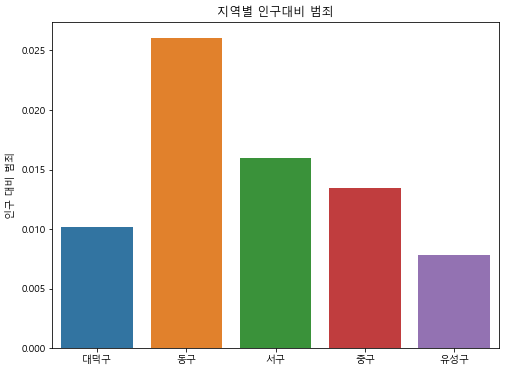

In [14]:
# 지역별 인구대비 범죄

plt.figure(figsize=(8,6))
sns.barplot(x=df_cctv_count.index.values, y="인구 대비 범죄", data=df_cctv_count)
plt.grid
plt.title('지역별 인구대비 범죄')
plt.show()

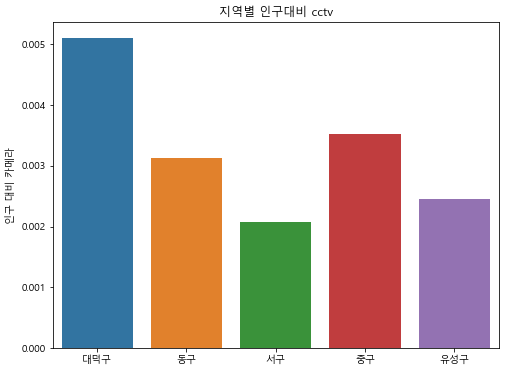

In [15]:
# 지역별 인구대비 cctv

plt.figure(figsize=(8,6))
sns.barplot(x=df_cctv_count.index.values, y="인구 대비 카메라", data=df_cctv_count)
plt.grid
plt.title('지역별 인구대비 cctv')
plt.show()

과연 cctv와 범죄율이 상관이 있을까?

In [16]:
# 상관관계 파악

df_corr = df_cctv_count.drop(columns=['카메라대수','지역별 인구수','지역별 범죄건수'])
df_corr

,인구 대비 카메라,인구 대비 범죄
대전지역별,,
대덕구,0.005106,0.010206
동구,0.003127,0.026074
서구,0.002067,0.015997
중구,0.003517,0.013454
유성구,0.002445,0.007834


In [17]:
df_corr.corr()

,인구 대비 카메라,인구 대비 범죄
인구 대비 카메라,1.000000,-0.182207
인구 대비 범죄,-0.182207,1.000000


-0.1 에서 0.1 거의 무시 선형관계

# 즉, 둘은 거의 상관이 없다고 판단했다.

# 그래도 시각화 도전!!

In [18]:
import json
import folium
from folium import plugins
geo_path = 'C:/Users/CPB06GameN/Desktop/cctv/test6.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [19]:
# 대전 지역별 범죄건수로 시각화

map = folium.Map(location=[36.335753, 127.396694], zoom_start=11, 
                 titles='대전 지도')  # 처음 보여지는 화면
map.choropleth(geo_data = geo_str,
               data = df_cctv_count['지역별 범죄건수'],
               columns = [df_cctv_count.index, df_cctv_count['지역별 범죄건수']],
               fill_color = 'YlGn', #PuRd, YlGnBu
               key_on = 'feature.id')   # 이것이 json 파일과 연결해주는 키
map

C:\Users\CPB06GameN\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# 이제 cctv 를 설치해보쟝

In [20]:
m = folium.Map(location=[36.335753, 127.396694], zoom_start=12,titles='대전 지도' )

In [21]:
mcg = folium.plugins.MarkerCluster(control=False) 
map.add_child(mcg)

In [22]:
g1 = folium.plugins.FeatureGroupSubGroup(mcg, '동구') 
map.add_child(g1)
g2 = folium.plugins.FeatureGroupSubGroup(mcg, '서구') 
map.add_child(g2)
g3 = folium.plugins.FeatureGroupSubGroup(mcg, '중구') 
map.add_child(g3)
g4 = folium.plugins.FeatureGroupSubGroup(mcg, '대덕구') 
map.add_child(g4)
g5 = folium.plugins.FeatureGroupSubGroup(mcg, '유성구') 
map.add_child(g5)

위도 경도 뽑기

In [23]:
df_dong = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_동구_CCTV_20190321.csv')
df_su = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_서구_CCTV_20190705.csv')
df_dae = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_대덕구_CCTV_20190331.csv')
df_u = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_유성구_CCTV_20190520.csv')
df_joong = pd.read_csv('C:/Users/CPB06GameN/Desktop/cctv/대전광역시_중구_CCTV_20190527.csv')

In [24]:
k1=df_dong[['위도','경도']]
k2=df_su[['위도','경도']]
k4=df_dae[['위도','경도']]
k5=df_u[['위도','경도']]
k3=df_joong[['위도','경도']]

구별로 위치찍기

In [25]:
# 동구 위치찍기 = g1
a = list(zip(k1['위도'], k1['경도']))
for w in a:
    folium.Marker(list(w)).add_to(g1) 

In [26]:
# 서구 위치찍기 = g2
a = list(zip(k2['위도'], k2['경도']))
for w in a:
    folium.Marker(list(w)).add_to(g2) 

In [27]:
# 중구 위치찍기 = g3
a = list(zip(k3['위도'], k3['경도']))
for w in a:
    folium.Marker(list(w)).add_to(g3) 

In [28]:
# 대덕구 위치찍기 = g4
a = list(zip(k4['위도'], k4['경도']))
for w in a:
    folium.Marker(list(w)).add_to(g4) 

In [29]:
# 유성구 위치찍기 = g5
a = list(zip(k5['위도'], k5['경도']))
for w in a:
    folium.Marker(list(w)).add_to(g5) 

# 지역별 범죄데이터와 cctv 데이터를 합쳐보았다 ><

In [31]:
folium.LayerControl(collapsed=False).add_to(map)
map

# 느낀점 

 - 파이썬은 정말 많이 개발이 많이 되어 있어 그것들을 활용하는 능력을 먼저 키워야겠다.